<a href="https://colab.research.google.com/github/shivam110601/abide_cnn_btech/blob/main/no_tx_vgg16_abide1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation

import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings

In [3]:
# Part 1 - Getting the data and defining parameters

from keras.preprocessing.image import ImageDataGenerator
input_size = (64, 64)

train_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/abide1datset/train',
                                                 target_size = input_size,
                                                 class_mode = 'binary',
                                                 color_mode = 'grayscale'
                                                 )

# test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/abide1datset/test',
                                            target_size = input_size,
                                            class_mode = 'binary',
                                            color_mode = 'grayscale')

Found 8636 images belonging to 2 classes.
Found 2460 images belonging to 2 classes.


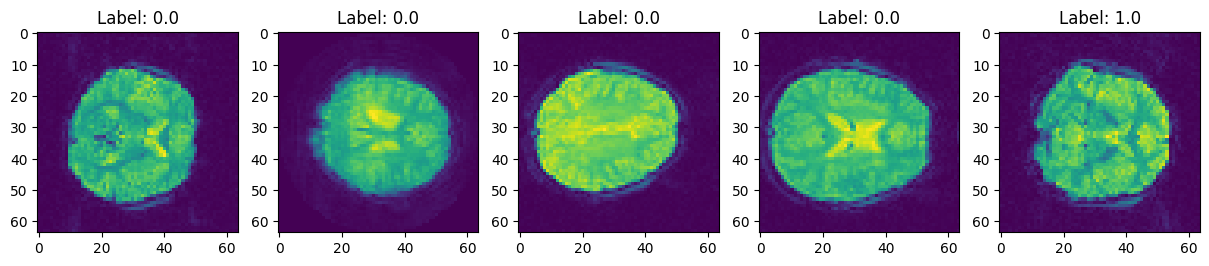

In [4]:
num_images_to_plot = 5
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 3))

for i in range(num_images_to_plot):
    # Get a batch of augmented images
    batch = training_set.next()

    # Extract the first image and label from the batch
    image = batch[0][0]
    label = batch[1][0]



    # Display the image and label
    axes[i].imshow(image)
    axes[i].set_title(f'Label: {label}')

plt.show()

In [5]:
input_size += (1, )

vgg16 = VGG16(weights=None,include_top=False,input_shape=input_size)

In [8]:
model = vgg16.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(0.5)(model)
model = tf.keras.layers.Dense(64,activation='relu')(model)
model = tf.keras.layers.Dense(1,activation='sigmoid')(model)
model = tf.keras.models.Model(inputs=vgg16.input, outputs = model)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        640       
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [10]:
base_learning_rate = 0.001
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              metrics= ['accuracy'])

In [11]:
# tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("/content/drive/MyDrive/abide1datset/notx_vgg16",monitor="accuracy",save_best_only=True,verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'loss', factor = 0.2, patience = 2, min_delta = 0.001,verbose=1)
early_stopping = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=4)

In [12]:
epochs = 30

history = model.fit(training_set,
                         epochs=epochs,
                         verbose=1, batch_size=32,
                         callbacks=[checkpoint, reduce_lr, early_stopping])

Epoch 1/30
270/270 [==============================] - ETA: 0s - loss: 0.7294 - accuracy: 0.5316
Epoch 1: accuracy improved from -inf to 0.53161, saving model to /content/drive/MyDrive/abide1datset/notx_vgg16
270/270 [==============================] - 1517s 6s/step - loss: 0.7294 - accuracy: 0.5316 - lr: 0.0010
Epoch 2/30
270/270 [==============================] - ETA: 0s - loss: 0.6913 - accuracy: 0.5324
Epoch 2: accuracy improved from 0.53161 to 0.53242, saving model to /content/drive/MyDrive/abide1datset/notx_vgg16
270/270 [==============================] - 23s 85ms/step - loss: 0.6913 - accuracy: 0.5324 - lr: 0.0010
Epoch 3/30
270/270 [==============================] - ETA: 0s - loss: 0.6913 - accuracy: 0.5324
Epoch 3: accuracy did not improve from 0.53242
270/270 [==============================] - 21s 79ms/step - loss: 0.6913 - accuracy: 0.5324 - lr: 0.0010
Epoch 4/30
270/270 [==============================] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epoch 4: accuracy did not impr

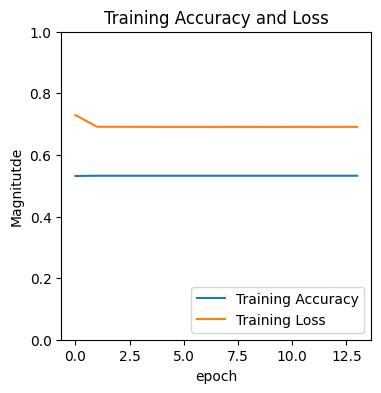

In [13]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure(figsize=(4, 4))
plt.plot(acc, label='Training Accuracy')
plt.plot(loss, label='Training Loss')
plt.legend(loc='lower right')
plt.ylabel('Magnitutde')
plt.ylim([0,1.0])
plt.title('Training Accuracy and Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
model.load_weights("/content/drive/MyDrive/abide1datset/notx_vgg16")

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc

In [ ]:
class_names = list(training_set.class_indices.keys())

# Make predictions on the test data
predictions = model.predict(test_set)

# 'predictions' will contain the predicted probabilities for each image
# For binary classification, you can threshold the probabilities to get class predictions (0 or 1)
predicted_classes = (predictions > 0.5).astype(int)

# Get the true class labels for the test data
true_classes = test_set.classes

# Calculate test accuracy
test_accuracy = accuracy_score(true_classes, predicted_classes)

# Print and return the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(true_classes, predictions)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print and return the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)